# 3장_콘웨이의 생명게임


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

## 1. 그리드 표현하기

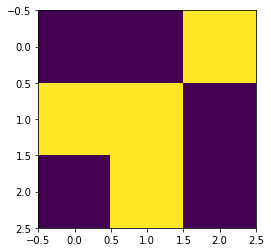

In [4]:
x = np.array([[0, 0, 255], [255, 255, 0], [0, 255, 0]])
plt.imshow(x, interpolation='nearest')

## 2. 초기 조건

In [16]:
a = np.random.choice([0,255], 4*4, p = [0.1, 0.9])
a

array([255, 255, 255, 255, 255, 255, 255, 255, 255,   0, 255, 255, 255,
       255, 255, 255])

In [17]:
a.reshape(4, 4)

array([[255, 255, 255, 255],
       [255, 255, 255, 255],
       [255,   0, 255, 255],
       [255, 255, 255, 255]])

- 0(OFF) 아니면 255(ON)를 랜덤하게 추출한다. 확률은 0 이 선택될 확률은 0.1 // 255가 선택될 확률은 0.9
- reshape함수를 써서 4 X 4로 만든다. 

In [22]:
def addGlider(i, j, grid):
    glider = np.array([[0, 0, 255],
                      [255, 0, 255],
                      [0, 255, 255]])
    grid[i: i+3, j:j+3] = glider 

In [31]:
#grid = np.zeros(N*N).reshape(N, N) 
#addGlider(1, 1, grid)

- 0(OFF) 아니면 255(ON)를 랜덤하게 추출한다. 확률은 0 이 선택될 확률은 0.1 // 255가 선택될 확률은 0.9
- reshape함수를 써서 4 X 4로 만든다. 

## 3. 경계 조건

### 환상형(도넛형) 경계 조건을 구현하는 방법에 대해 이야기 해본다
```
- 먼저 크기가 N X N인 그리드의 오른쪽 가장자리부터 따져본다
- i번째 행의 오른쪽 끝에 위치하는 셀은 grid[i][N-1]로 접근할 수 있다. 
- 이 셀의 오른쪽 인접 셀은 원래는 grid[i][N]이 되지만, 환상형 경계 조건에 따라서 grid[i][N]은 grid[i][0]으로 바뀌어야 한다. 
```

<코드>
```
if j = N - 1:
    right = grid[i][0]
else:
    right = grid[i][j+1]
```

In [38]:
N = 16
i1 = 14
i2 = 15
(i1+1)%N

15

In [39]:
(i2+1)%N

0

In [42]:
#right = grid[i][(j+1%N)]

## 4. 규칙 구현하기

- 생명게임의 규칙은 ON 또는 OFF 상태인 인접 셀의 개수에 기초한다. 
- 규칙의 적용을 단순화하기 위해 ON상태인 인접 셀들의 총 개수를 계산한다. 
- ON상태는 값이 255이므로 ON상태인 셀의 개수를 얻으려면 인접 셀의 값을 모두 더한 다음에 255로 나누면 된다. 

In [53]:
N = 4
grid = np.zeros(N*N).reshape(N, N)

# if grid[i, j] == ON:
#     if (total < 2) or (total > 3):
#         newGrid[i, j] = 255
#     else:
#         if total == 3:
#             newGrid[i, j] = ON

## 5. 프로그램에 명령 라인 인수 전달하기

In [56]:
# main() 함수

def main():
    # 명령 라인 인수들은 sys.argv[1], sys.argv[2] ... 안에 있다. 
    # sys.argv[0]은 스크립트 이름이며 무시해도 된다.
    # 인수들을 파싱한다. 
    parser = argparse.ArgumentParser(description = "Runs Conway's Game of Life simulation")
    # 인수들을 추가한다.
    parser.add_argument('--grid-size', dest='N', required=False)
    parser.add_argument('--mov-file', dest='movfile', required=False)
    parser.add_argument('--interval', dest='interval', required=False)
    parser.add_argument('--glider', dest='store_true', required=False)
    args = parser.parse_args()

### main()함수는 프로그램의 명령 라인 매개변수를 정의하는 것부터 시작한다.
1. 명령라인 옵션을 추가하기위해 argparse클래스를 사용하고, 그 다음 줄에서 다양한 옵션을 추가하고 있다. 
2. 그리드의 크기 N을 지정한다. 
3. 저장될 .mov파일명을 지정한다. 
4. 밀리초 단위로 애니메이션 갱신 간격을 설정한다. 
5. 글라이더 패턴으로 시뮬레이션을 시작한다.  

## 6. 시뮬레이션 초기화 하기

```
# 그리드 크기를 설정한다. 
N = 100
if args.N and int(args.N) > 8:
    N = int(args.N)

# 애니메이션 갱신 간격을 설정한다. 
updateInterval = 50
if args.interval:
    updateInterval = int(args.interval)

# 그리드를 선언한다. 
grid = np.array([])
# 글라이더 데모 플래그가 지정됐는지 검사한다. 
if args.glider:
    grid = np.zeros(N*N).reshape(N, N)
    addGlider(1, 1, grid)
else:
    # 임의로 on/off를 그리드에 지정한다. 
    grid = randomGrid(N)

# 애니메이션을 설정한다. 
fig, ax = plt.subplot()
img = ax.imshow(grid, interpolation='nearest')
ani = animation.FuncAnimation(fig, update, fargs=(img, grid, N, ),
                              frames=10,
                              interval=updateInterval,
                              save_count=50)
# 프레임의 수?
# 출력 파일을 설정한다. 
if args.movfile:
    ani.save(args.movfile, fps=30, extra_args=['-vcodec','libx264'])
plt.show()
```

#### 참고자료

https://github.com/YunaSon/Sample/blob/master/PythonProgramming/3_Python%EC%9C%BC%EB%A1%9C%20IMAGE%ED%8C%8C%EC%9D%BC%20%EB%8B%A4%EB%A3%A8%EA%B8%B0.ipynb

## 7. 전체코드

https://github.com/electronut/pp/blob/master/karplus/ks.py